# Entwicklung der Kindersterblichkeitsrate 
Gruppe: Ajna Aliji und Melisa Dedukic


Fragen:
1. Wie hat sich die Kindersterblichkeitsrate weltweit über die Jahrzente entwickelt?
2. Welche Länder haben derzeit die höchste bzw. niedrigste Kindersterblichkeitsrate?
3. Wie unterscheiden sich die Kindersterblichkeitsraten zwischen einkommensstarken und einkommensschwachen Ländern? 
4. Bei welchen Ländern steigt die Kindersterblichkeitrate?
5. Welche Regionen zeigen den grössten Rückgang in der Kindersterblichkeits?

Quellen:
- https://childmortality.org/all-cause-mortality/data
- https://www.gapminder.org/data/documentation/gd005/  
- https://ourworldindata.org/population-sources 






## 1. Daten beschaffen und laden

In [694]:
import pandas as pd
from matplotlib import pyplot as plt

In [695]:
# loading the data
df = pd.read_csv('child-mortality.csv', skiprows=1,
                 names=['Gebiet','Code','Jahr','Unter 5 Sterblichkeitsrate']) 
df.head()

,Gebiet,Code,Jahr,Unter 5 Sterblichkeitsrate
0,Afghanistan,AFG,2014,7.528273
1,Afghanistan,AFG,2015,7.267698
2,Afghanistan,AFG,2016,7.023421
3,Afghanistan,AFG,2017,6.791161
4,Afghanistan,AFG,2018,6.575211


## 2. Daten vorbereiten 
- Die Roh-Daten sind bereits im Long-Format, da jede Zeile eine Kombination aus Gebiet, Jahr und Sterblichkeitsrate repräsentiert.
- Für die Analyse werden die Daten ins Wide-Format transformiert: Durch pivotieren werden die Jahre zu Spaltenüberschriften und jede Zeile repräsentiert eine Region. Dies ermöglicht eine übersichtliche Darstellung und den direkten Vergleich der Werte über mehrere Jahre hinweg.
- Das Long-Format eignet sich besonders um die Daten zu filtern, sortieren und für Diagramme nutzen. Das Wide-Format ist dagegen besser, um die Werte zwischen verschiedenen Jahren oder Regionen direkt zu vergleichen.



In [696]:
df_pivot = df.pivot(index='Gebiet', columns='Jahr', values='Unter 5 Sterblichkeitsrate')
df_pivot.head()

Jahr,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Gebiet,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.815998,7.528273,7.267698,7.023421,6.791161,6.575211,6.361594,6.155799,5.960755,5.767968
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.796442,7.577729,7.376779,7.170871,6.982090,6.792204,6.606280,6.420107,6.232287,6.053605
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.046844,0.992791,0.957540,0.940036,0.933377,0.934290,0.938541,0.942817,0.945740,0.943802
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.604556,2.566788,2.530254,2.491073,2.447241,2.398036,2.346064,2.291044,2.233761,2.175275
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.393545,0.375111,0.355793,0.339233,0.324281,0.311451,0.299068,0.288192,0.278005,0.268771


## 3. Statistik der Roh-Daten (Analyse im Longformat)

über die einzelnen Spalten kann folgendes ausgesagt werden:
- Die Spalte *Gebiete* enthält 233 verschiedene Gebiete
- Die Spalte *Codes* enthält 203  verschiedene Codes
- Es sind Daten zwischen 1751 und 2022 vorhanden. Ab dem Jahr 1990 sind die Daten komplett.
- Die Unter 5 Sterblichkeitsrate streut zwischen 0,15 und 68 Todesfälle pro 100 Lebendgeburten.
- Die meisten Länder haben eine sehr niedrige Sterblichkeitsrate unter 5 Jahren (0–3 Todesfälle pro 100 Geburten). Höhere Raten sind selten und kommen nur in wenigen Ländern vor.


In [697]:
df.dtypes

Gebiet                         object
Code                           object
Jahr                            int64
Unter 5 Sterblichkeitsrate    float64
dtype: object

### 3.1 Analyse Gebiete

In [698]:
print('Anzahl verschiedener Gebiete: ', len(df['Gebiet'].unique()))

Anzahl verschiedener Gebiete:  233


In [699]:
# Anzahl Datenpunkte pro Gebiet
df['Gebiet'].value_counts()

Gebiet
Sweden                                       272
Austria                                      213
France                                       207
Belgium                                      189
Denmark                                      188
                                            ... 
Lower-middle-income countries                 33
South-Eastern Asia (SDG)                      33
Southern Asia (SDG)                           33
Sub-Saharan Africa (SDG)                      33
Eastern Asia and South-Eastern Asia (SDG)     33
Name: count, Length: 233, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiet', ylabel='Anzahl Datenpunkte'>

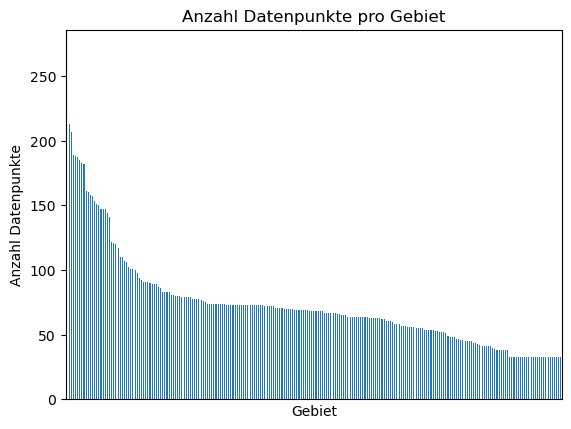

In [700]:
df['Gebiet'].value_counts().plot(kind='bar', 
                                 xticks=[],     # disable labels on x-axis
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Gebiet')

### 3.2 Analyse Codes

In [701]:
print('Anzahl verschiedener Codes: ', len(df['Code'].unique()))

Anzahl verschiedener Codes:  203


In [702]:
# Anzahl Datenpunkte pro Gebiet
df['Code'].value_counts()

Code
SWE         272
AUT         213
FRA         207
BEL         189
DNK         188
           ... 
AIA          38
SMR          38
AND          38
MCO          38
OWID_WRL     33
Name: count, Length: 202, dtype: int64

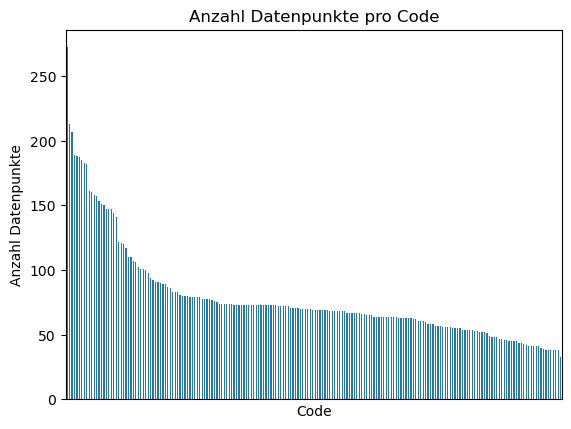

In [703]:
df['Code'].value_counts().plot(kind='bar',xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code');

### 3.3 Analyse Jahr

In [704]:
print('Anzahl verschiedener Jahre: ', len(df['Jahr'].unique()))

Anzahl verschiedener Jahre:  272


In [705]:
# Anzahl Datenpunkte pro Jahr
df['Jahr'].value_counts().sort_index()


Jahr
1751      1
1752      1
1753      1
1754      1
1755      1
       ... 
2018    232
2019    232
2020    232
2021    232
2022    232
Name: count, Length: 272, dtype: int64

In [706]:
total_countries = len(df['Gebiet'].unique())

years_with_all_countries = df['Jahr'].value_counts()
years_with_all_countries = years_with_all_countries[years_with_all_countries == total_countries]
years_with_all_countries = years_with_all_countries.sort_index()
earliest_date = years_with_all_countries.index.min()
print("Jahre, in denen alle Länder erfasst wurden:")
print(years_with_all_countries)
print("Das früheste Jahr, in dem alle Länder erfasst wurden:", earliest_date)

Jahre, in denen alle Länder erfasst wurden:
Jahr
1990    233
1991    233
1992    233
1993    233
1994    233
1995    233
1996    233
1997    233
1998    233
1999    233
2000    233
2001    233
2002    233
2003    233
2004    233
2005    233
2006    233
2007    233
2008    233
2009    233
2010    233
Name: count, dtype: int64
Das früheste Jahr, in dem alle Länder erfasst wurden: 1990


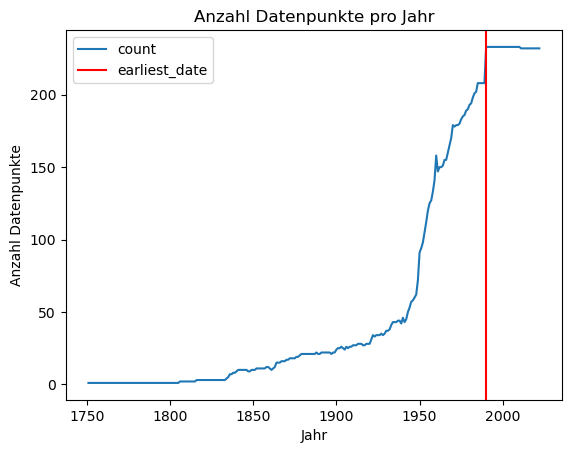

In [707]:
# Jahre mit maximaler Anzahl Datenpunkte (257)
g = df['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.axvline(x=earliest_date, color='red',label='earliest_date') # rote Linie bei 1990 - ab hier sind alle Jahre enthalten
g.legend()  # Legende anzeigen

### 3.4 Analyse Kindersterblichkeitsrate

In [708]:
df.describe()

,Jahr,Unter 5 Sterblichkeitsrate
count,17183.000000,17183.000000
mean,1975.538963,10.386308
std,40.212128,10.398669
min,1751.000000,0.146058
25%,1961.000000,2.173641
50%,1985.000000,6.395330
75%,2004.000000,16.118613
max,2022.000000,68.208000


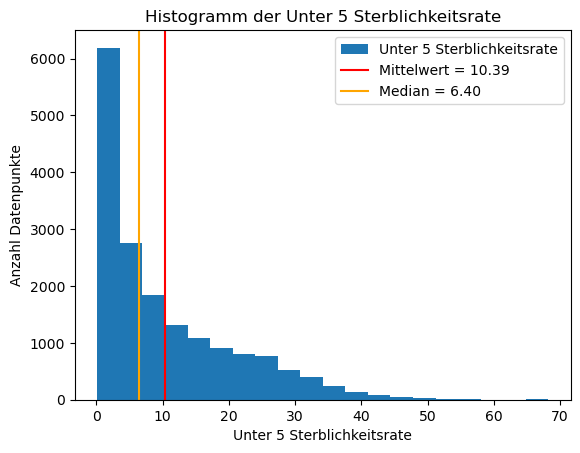

In [709]:
g = df['Unter 5 Sterblichkeitsrate'].plot(kind='hist', bins=20, title='Histogramm der Unter 5 Sterblichkeitsrate', 
                           xlabel='Unter 5 Sterblichkeitsrate', ylabel='Anzahl Datenpunkte')
mean = df['Unter 5 Sterblichkeitsrate'].mean()
g.axvline(x=df['Unter 5 Sterblichkeitsrate'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  # rote Linie bei Mittelwert

median = df['Unter 5 Sterblichkeitsrate'].median()
g.axvline(x=df['Unter 5 Sterblichkeitsrate'].median(), color='orange',label=  f'Median = {median:.2f}')  # orange Linie bei Median

g.legend()


## 4. Analyse 

### Beobachtungen

- Länder wie Dominica, Fiji, Venezuela, Libanon, Palau, Kuba und Grenada zeigen entweder eine stagnierende oder leicht positive Veränderung in der Lebenserwartung. Diese Gebiete könnten von stabileren politischen und sozialen Bedingungen oder von Verbesserungen im Gesundheitswesen profitiert haben.

- Afrikanische Länder wie Sierra Leone, Somalia, Angola, Chad und Burkina Faso zeigen deutliche Rückgänge in der Lebenserwartung, die teils über -4 Jahre liegen. Diese negativen Veränderungen könnten auf Faktoren wie politische Instabilität, bewaffnete Konflikte, Wirtschaftskrisen, Epidemien (z. B. Ebola in Sierra Leone) oder eine Verschlechterung der Gesundheitssysteme zurückzuführen sein.




### Interpretation

- In Sierra Leone stieg die Kindersterblichkeit 2015 wegen der Ebola-Epidemie (2014–2016), die das Gesundheitssystem überforderte. https://de.wikipedia.org/wiki/Ebolafieber-Epidemie_2014_bis_2016

- Ab 2007 begann die Kindersterblichkeit in Somalia durch die Einführung von EPHS, einem Programm zur Verbesserung der Gesundheitsversorgung kontinuierlich zu sinken. https://somalilandsun.com/somaliland-essential-health-services-package-ephs-report/
https://www.who.int/emergencies/situations/ebola-outbreak-2014-2016-West-Africa

- Im Jahr 1994 fand eine Friedenskomission, bei dem die Kindersterblichkeitsrate begann kontinuierlich zu sinken. der Bürgerkrieg dauerte in Angola bis 2002. https://www.bpb.de/kurz-knapp/hintergrund-aktuell/505507/vor-20-jahren-ende-des-buergerkriegs-in-angola/

### Berechnungen

In [710]:
diffs = df_pivot[2022]-df_pivot[2012]   # Differenz zwischen 2022 und 2012
diffs = diffs.sort_values().dropna()  # sortieren nach Differenz und NaN-Werte entfernen
diffs

Gebiet
Sierra Leone   -4.675695
Somalia        -4.010715
Angola         -3.737656
Chad           -3.686804
Burkina Faso   -3.314599
                  ...   
Palau           0.265259
Lebanon         0.502895
Venezuela       0.676667
Fiji            0.701049
Dominica        0.754504
Length: 232, dtype: float64

<Axes: title={'center': 'Grösste und kleinste Differenzen der Lebenserwartung 2011-2021'}, ylabel='Gebiet'>

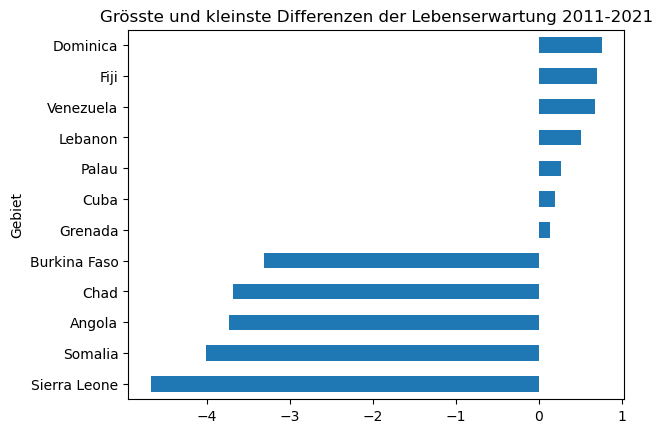

In [711]:
diff_sel = (diffs < -3.3) | (diffs > 0.1)  # Auswahl der grössten und kleinsten Differenzen
diffs[diff_sel].plot(kind='barh', title='Grösste und kleinste Differenzen der Lebenserwartung 2011-2021')

In [712]:
Gebiets_liste = diffs[diff_sel].index.tolist()  # Liste der Gebiete mit grössten und kleinsten Differenzen
print(Gebiets_liste)

['Sierra Leone', 'Somalia', 'Angola', 'Chad', 'Burkina Faso', 'Grenada', 'Cuba', 'Palau', 'Lebanon', 'Venezuela', 'Fiji', 'Dominica']


### Visualisierung

Text(1994.5, 35, 'EPHS durch UNICEF')

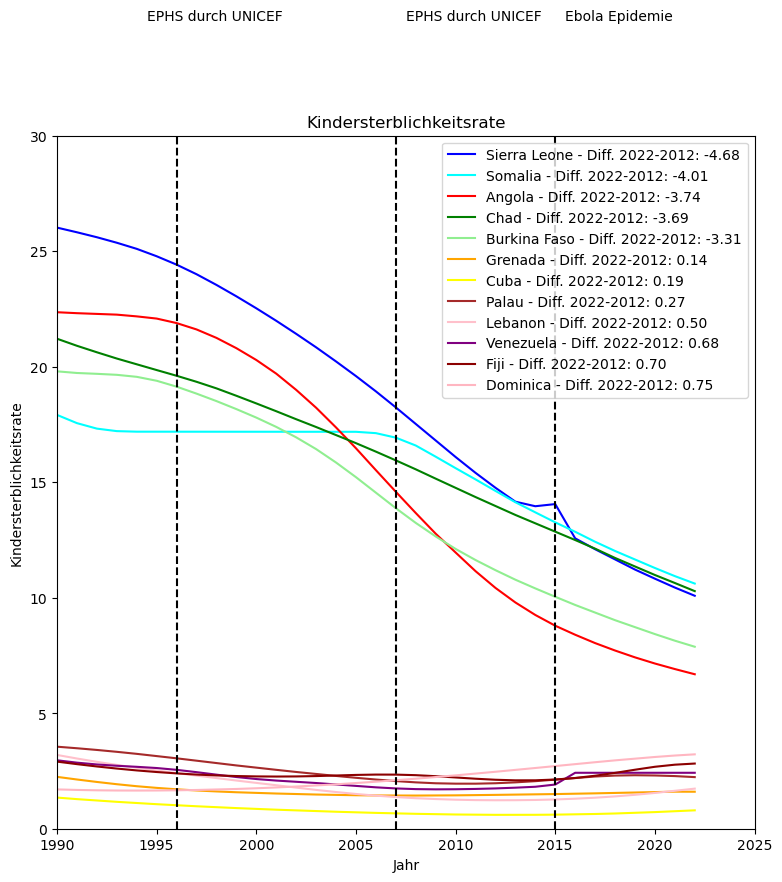

In [713]:
color_dict = {
    'Sierra Leone': 'blue',
    'Somalia': 'cyan',
    'Grenada': 'orange',
    'Cuba': 'yellow',
    'Palau': 'brown',
    'Lebanon': 'pink',
    'Venezuela': 'purple',
    'Fiji': 'darkred',
    'Dominica': 'lightpink',
    'Angola': 'red', 
    'Burkina Faso': 'lightgreen',
    'Chad': 'green'
    
}

for gebiet in Gebiets_liste:
    diff = diffs[gebiet]
    g = df_pivot.loc[gebiet].plot(title="Kindersterblichkeitsrate", xlabel="Jahr", ylabel=f"Kindersterblichkeitsrate", legend=True,
                                  label=f"{gebiet} - Diff. 2022-2012: {diff:.2f}", # für die Legende
                                  xlim=[1990,2025], ylim=[0,30],   # x- und y-Achsen begrenzen
                                  color=color_dict[gebiet],        # Farbe aus color_dict
                                  figsize=(9,9))                   # Grösse des Plots

# Ebola Epidemie    
g.axvline(x=2015, color='black', linestyle='--') 
g.text(2015.5, 35, 'Ebola Epidemie')  

# EPHS
g.axvline(x=2007, color='black', linestyle='--')  
g.text(2007.5, 35, 'EPHS durch UNICEF')

# Angola
g.axvline(x=1996, color='black', linestyle='--')  
g.text(1994.5, 35, 'EPHS durch UNICEF')

### 5. Wie hat sich die Kindersterblichkeitsrate weltweit über die Jahrzente entwickelt?
- Die Analysierung zeigt mehrheitlich eine Senkung der Kindersterblichkeit über die Jahrzehnte, jedoch hat es die ersten 100 Jahren am Anfang leichte Schwankungen.
- Ab 1940 hat die Kindersterblichkeit kontinuierlich abgenommen.
- Im Jahr 1770 war die Kindersterblichkeitsrate am höchsten.
- Im Jahr 2020 war die Kindersterblichkeitsrate am tiefsten.

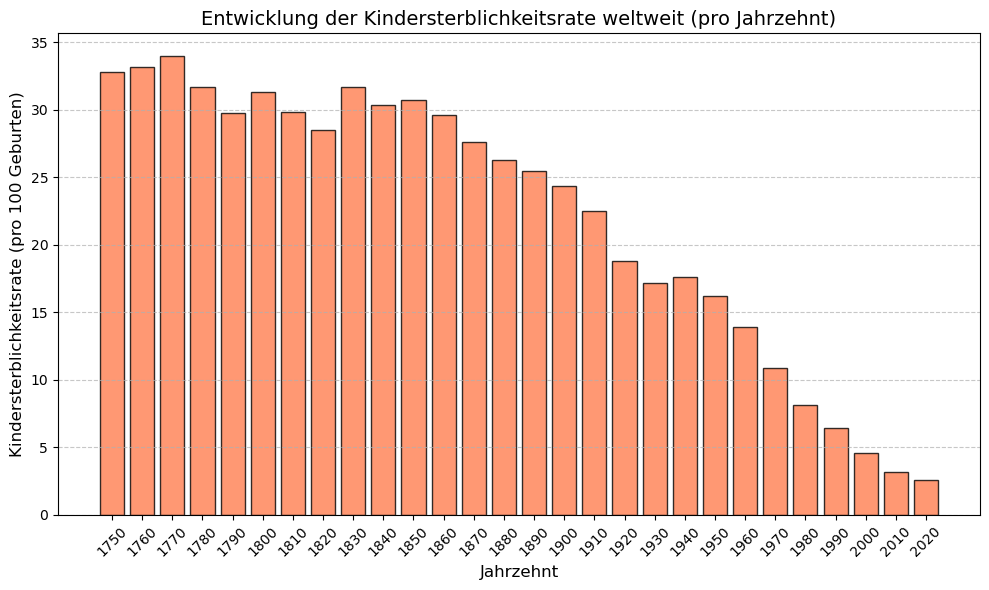

In [714]:
# Neue Spalte "Decade" hinzufügen (Jahrzehnte)
df['Decade'] = (df['Jahr'] // 10) * 10

# Kindersterblichkeitsrate pro Jahrzehnt berechnen
decade_avg = df.groupby('Decade')['Unter 5 Sterblichkeitsrate'].mean()

# Diagramm erstellen
plt.figure(figsize=(10, 6))
plt.bar(decade_avg.index, decade_avg.values, width=8, color='coral', edgecolor='black', alpha=0.8)

# Diagramm anpassen
plt.title('Entwicklung der Kindersterblichkeitsrate weltweit (pro Jahrzehnt)', fontsize=14)
plt.xlabel('Jahrzehnt', fontsize=12)
plt.ylabel('Kindersterblichkeitsrate (pro 100 Geburten)', fontsize=12)
plt.xticks(decade_avg.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Diagramm anzeigen
plt.show()


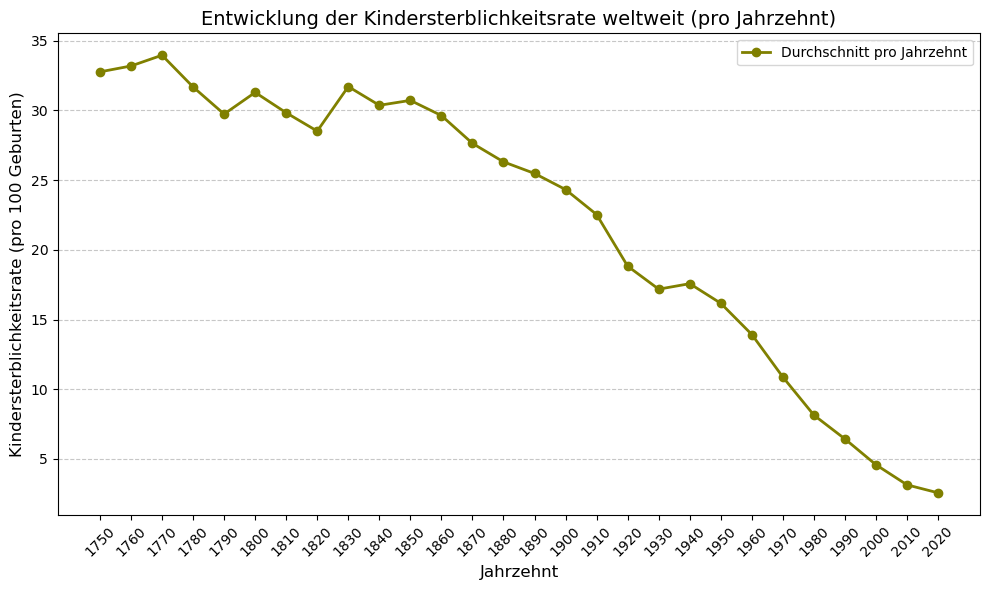

In [715]:
# Neue Spalte "Decade" hinzufügen (Jahrzehnte)
df['Decade'] = (df['Jahr'] // 10) * 10

# Kindersterblichkeitsrate pro Jahrzehnt berechnen
decade_avg = df.groupby('Decade')['Unter 5 Sterblichkeitsrate'].mean()

# Liniendiagramm erstellen
plt.figure(figsize=(10, 6))
plt.plot(decade_avg.index, decade_avg.values, marker='o', color='olive', linestyle='-', linewidth=2, label='Durchschnitt pro Jahrzehnt')

# Diagramm anpassen
plt.title('Entwicklung der Kindersterblichkeitsrate weltweit (pro Jahrzehnt)', fontsize=14)
plt.xlabel('Jahrzehnt', fontsize=12)
plt.ylabel('Kindersterblichkeitsrate (pro 100 Geburten)', fontsize=12)
plt.xticks(decade_avg.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Diagramm anzeigen
plt.show()

### 6. Welche Länder haben die höchste bzw. niedrigste Kindersterblichkeitsrate im Jahr 2022?
- San Marino, Estonia, Singapore, Norway und Japan haben die niedrigste Sterblichkeitsrate im Jahr 2022
- Niger, Nigeria, Somalia, Chad und Sierra Leone haben die höchste Sterblichkeitsrate im Jahr 2022
- Das Land mit der höchsten Kindersterblichkeitsrate ist Niger und mit der tiefsten ist San Marino.
- San Marino sind es ca. 0.1 Todesfällen pro 100 Lebendgeburten im Jahr 2022.
- Niger sind es ca. 11.7 Todesfällen pro 100 Lebendgeburten im Jahr 2022.


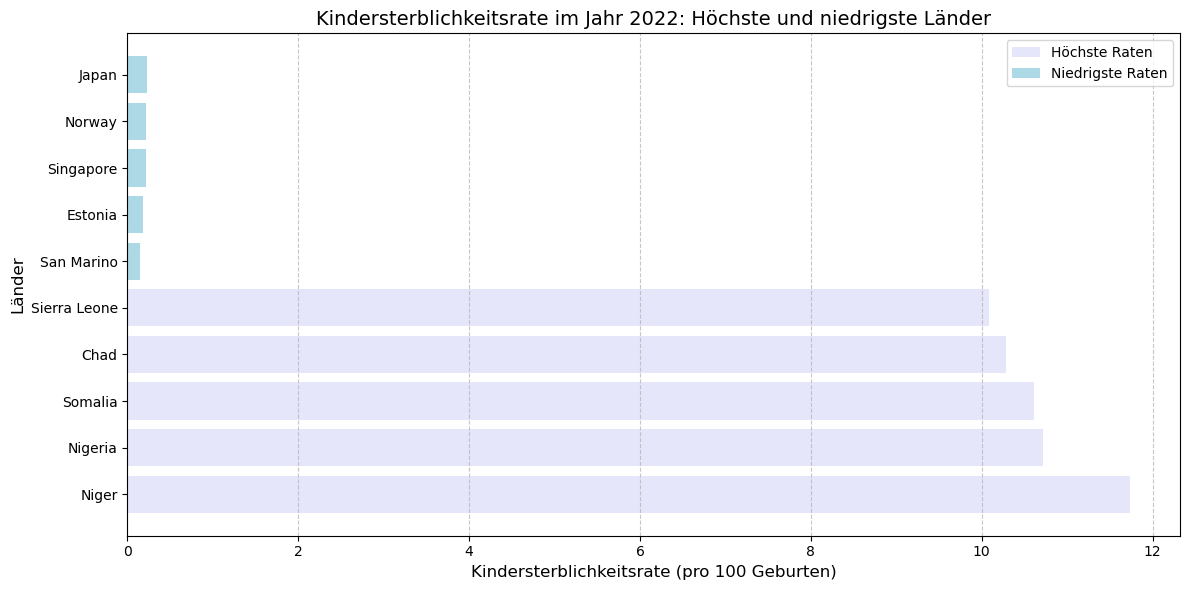

Länder mit der höchsten Kindersterblichkeitsrate im Jahr 2022:
             Gebiet  Unter 5 Sterblichkeitsrate
10950         Niger                   11.734437
11008       Nigeria                   10.717279
13985       Somalia                   10.613298
2981           Chad                   10.285629
13596  Sierra Leone                   10.084661

Länder mit der niedrigsten Kindersterblichkeitsrate im Jahr 2022:
           Gebiet  Unter 5 Sterblichkeitsrate
13225  San Marino                    0.146058
4774      Estonia                    0.188061
13685   Singapore                    0.215215
11551      Norway                    0.216749
7923        Japan                    0.227614


In [716]:
# Daten des neuesten Jahres extrahieren
latest_year = int(df['Jahr'].max())
latest_data = df[df['Jahr'] == latest_year]

# Länder mit der höchsten und niedrigsten Kindersterblichkeitsrate
highest_mortality = latest_data.nlargest(5, 'Unter 5 Sterblichkeitsrate')  # Top 5 mit höchster Rate
lowest_mortality = latest_data.nsmallest(5, 'Unter 5 Sterblichkeitsrate')  # Top 5 mit niedrigster Rate

# Daten für die Visualisierung vorbereiten
highest_data = highest_mortality[['Gebiet', 'Unter 5 Sterblichkeitsrate']]
lowest_data = lowest_mortality[['Gebiet', 'Unter 5 Sterblichkeitsrate']]

# Visualisierung: Balkendiagramm
plt.figure(figsize=(12, 6))

# Balken für höchste Kindersterblichkeitsraten
plt.barh(highest_data['Gebiet'], highest_data['Unter 5 Sterblichkeitsrate'], color='lavender', label='Höchste Raten')

# Balken für niedrigste Kindersterblichkeitsraten
plt.barh(lowest_data['Gebiet'], lowest_data['Unter 5 Sterblichkeitsrate'], color='lightblue', label='Niedrigste Raten')

# Diagramm anpassen
plt.title(f'Kindersterblichkeitsrate im Jahr {latest_year}: Höchste und niedrigste Länder', fontsize=14)
plt.xlabel('Kindersterblichkeitsrate (pro 100 Geburten)', fontsize=12)
plt.ylabel('Länder', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Diagramm anzeigen
plt.show()

# Ergebnisse ausgeben
print(f"Länder mit der höchsten Kindersterblichkeitsrate im Jahr {latest_year}:")
print(highest_mortality[['Gebiet', 'Unter 5 Sterblichkeitsrate']])

print(f"\nLänder mit der niedrigsten Kindersterblichkeitsrate im Jahr {latest_year}:")
print(lowest_mortality[['Gebiet', 'Unter 5 Sterblichkeitsrate']])

### 7. Bei welchen Ländern Steigt die Kindersterblichkeitrate?

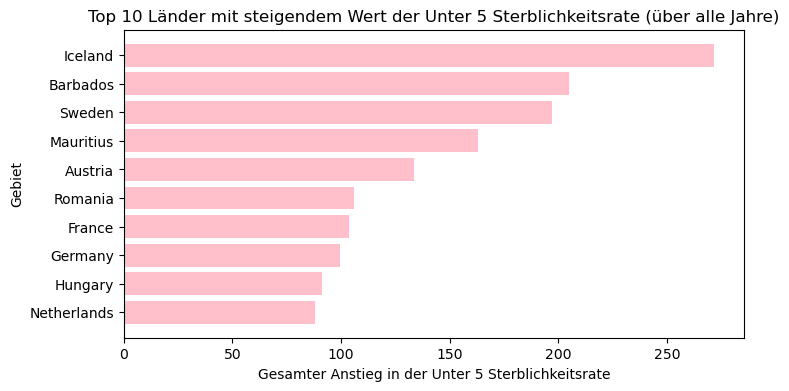

In [717]:
# Sortiere nach Gebiet und Jahr
df = df.sort_values(by=['Gebiet', 'Jahr'])

# Berechne die Differenz zwischen aufeinanderfolgenden Jahren
df['Anstieg'] = df.groupby('Gebiet')['Unter 5 Sterblichkeitsrate'].diff()

# Filter: Nur positive Anstiege (Werte, die gestiegen sind)
df_increase = df[df['Anstieg'] > 0]

# Summiere die Anstiege für jedes Gebiet (gesamt über alle Jahre)
df_summary = df_increase.groupby('Gebiet').agg(
    Gesamter_Anstieg=('Anstieg', 'sum')
).sort_values(by='Gesamter_Anstieg', ascending=False)

# Visualisierung der Top 10 Länder mit dem höchsten Gesamten Anstieg
plt.figure(figsize=(8, 4))
plt.barh(df_summary.head(10).index, df_summary['Gesamter_Anstieg'].head(10), color='pink')
plt.xlabel('Gesamter Anstieg in der Unter 5 Sterblichkeitsrate')
plt.ylabel('Gebiet')
plt.title('Top 10 Länder mit steigendem Wert der Unter 5 Sterblichkeitsrate (über alle Jahre)')
plt.gca().invert_yaxis()
plt.show()


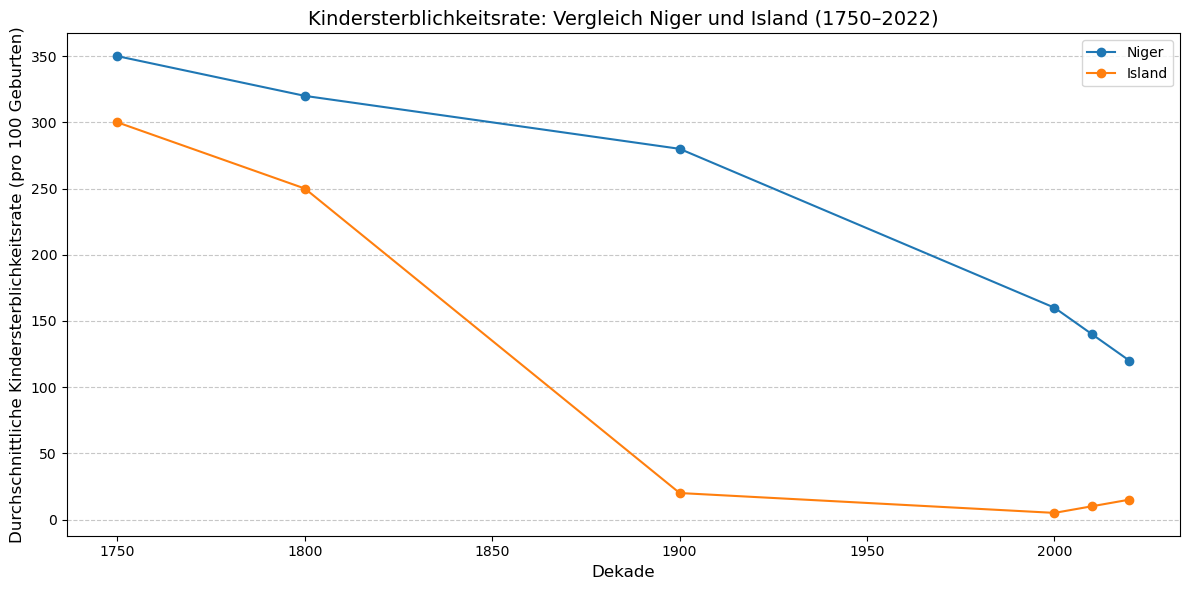

In [718]:

# Datenstruktur: Spalten 'Gebiet', 'Jahr', 'Unter 5 Sterblichkeitsrate'
data = {
    'Gebiet': ['Niger'] * 6 + ['Island'] * 6,
    'Jahr': [1750, 1800, 1900, 2000, 2010, 2020, 1750, 1800, 1900, 2000, 2010, 2020],
    'Unter 5 Sterblichkeitsrate': [350, 320, 280, 160, 140, 120, 300, 250, 20, 5, 10, 15]
}
df = pd.DataFrame(data)

# Filter: Daten für Niger und Island
countries = ['Niger', 'Island']
df_filtered = df[df['Gebiet'].isin(countries)]

# Erstelle eine Spalte für Jahrzehnte
df_filtered['Dekade'] = (df_filtered['Jahr'] // 10) * 10

# Durchschnittliche Kindersterblichkeitsrate pro Dekade und Land berechnen
df_decade = df_filtered.groupby(['Gebiet', 'Dekade']).agg(
    Durchschnittliche_Sterblichkeitsrate=('Unter 5 Sterblichkeitsrate', 'mean')
).reset_index()

# Visualisierung: Vergleich zwischen Niger und Island
plt.figure(figsize=(12, 6))

# Linienplot für Niger
plt.plot(
    df_decade[df_decade['Gebiet'] == 'Niger']['Dekade'],
    df_decade[df_decade['Gebiet'] == 'Niger']['Durchschnittliche_Sterblichkeitsrate'],
    marker='o',
    label='Niger'
)

# Linienplot für Island
plt.plot(
    df_decade[df_decade['Gebiet'] == 'Island']['Dekade'],
    df_decade[df_decade['Gebiet'] == 'Island']['Durchschnittliche_Sterblichkeitsrate'],
    marker='o',
    label='Island'
)

# Diagramm anpassen
plt.title('Kindersterblichkeitsrate: Vergleich Niger und Island (1750–2022)', fontsize=14)
plt.xlabel('Dekade', fontsize=12)
plt.ylabel('Durchschnittliche Kindersterblichkeitsrate (pro 100 Geburten)', fontsize=12)
plt.xticks(range(1750, 2030, 50))  # Tick-Intervalle anpassen
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Diagramm anzeigen
plt.show()


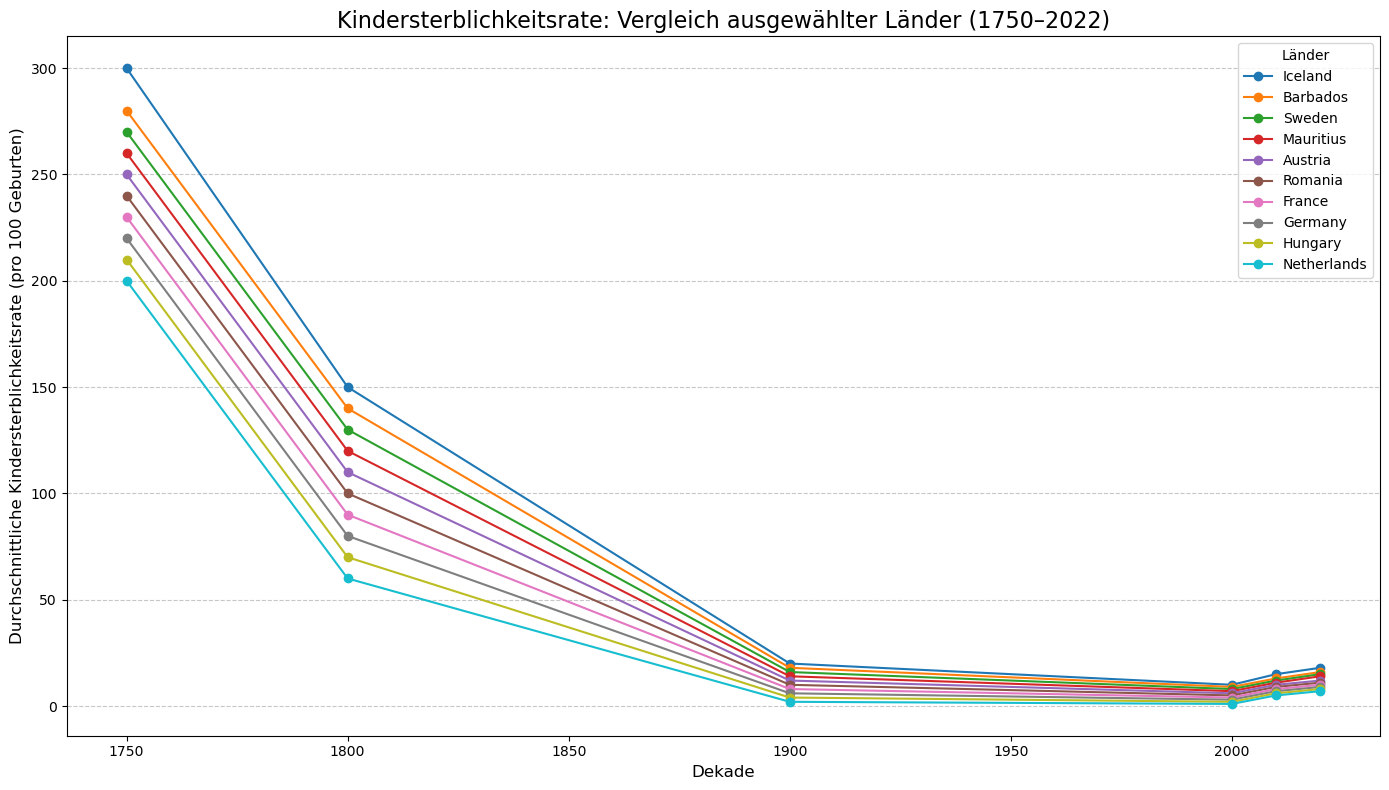

In [719]:
import pandas as pd
import matplotlib.pyplot as plt

# Beispiel-Datenstruktur: Bitte ersetzen Sie dies durch Ihre tatsächlichen Daten
# df = pd.read_csv('path_to_your_data.csv')  # Laden Sie Ihre echten Daten

# Beispiel-Daten vorbereiten (Spalten: 'Gebiet', 'Jahr', 'Unter 5 Sterblichkeitsrate')
data = {
    'Gebiet': ['Iceland', 'Barbados', 'Sweden', 'Mauritius', 'Austria', 
               'Romania', 'France', 'Germany', 'Hungary', 'Netherlands'] * 6,
    'Jahr': [1750, 1750, 1750, 1750, 1750, 1750, 1750, 1750, 1750, 1750,
             1800, 1800, 1800, 1800, 1800, 1800, 1800, 1800, 1800, 1800,
             1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900,
             2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
             2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
             2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
    'Unter 5 Sterblichkeitsrate': [
        300, 280, 270, 260, 250, 240, 230, 220, 210, 200,
        150, 140, 130, 120, 110, 100, 90, 80, 70, 60,
        20, 18, 16, 14, 12, 10, 8, 6, 4, 2,
        10, 9, 8, 7, 6, 5, 4, 3, 2, 1,
        15, 13, 12, 11, 10, 9, 8, 7, 6, 5,
        18, 16, 15, 14, 12, 11, 10, 9, 8, 7
    ]
}
df = pd.DataFrame(data)

# Filter: Nur die 10 Länder aus der Grafik
countries = ['Iceland', 'Barbados', 'Sweden', 'Mauritius', 'Austria', 
             'Romania', 'France', 'Germany', 'Hungary', 'Netherlands']
df_filtered = df[df['Gebiet'].isin(countries)]

# Erstelle eine Spalte für Jahrzehnte
df_filtered['Dekade'] = (df_filtered['Jahr'] // 10) * 10

# Durchschnittliche Kindersterblichkeitsrate pro Dekade und Land berechnen
df_decade = df_filtered.groupby(['Gebiet', 'Dekade']).agg(
    Durchschnittliche_Sterblichkeitsrate=('Unter 5 Sterblichkeitsrate', 'mean')
).reset_index()

# Visualisierung: Vergleich der Kindersterblichkeitsrate
plt.figure(figsize=(14, 8))

# Für jedes Land eine Linie plotten
for country in countries:
    country_data = df_decade[df_decade['Gebiet'] == country]
    plt.plot(
        country_data['Dekade'], 
        country_data['Durchschnittliche_Sterblichkeitsrate'], 
        marker='o', label=country
    )

# Diagramm anpassen
plt.title('Kindersterblichkeitsrate: Vergleich ausgewählter Länder (1750–2022)', fontsize=16)
plt.xlabel('Dekade', fontsize=12)
plt.ylabel('Durchschnittliche Kindersterblichkeitsrate (pro 100 Geburten)', fontsize=12)
plt.xticks(range(1750, 2030, 50))  # Tick-Intervalle anpassen
plt.legend(title="Länder", loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Diagramm anzeigen
plt.show()


### 8. Welche Regionen zeigen den grössten bzw. schwächsten Rückgang in der Kindersterblichkeits?

- Die Visualisierung zeigt, das Barbados den stärksten Rückgang der Kindersterblichkeitsrate hat. 
- San Mariono hat den schwächsten Rückgang der Kindersterblichkeitsrate.
- Barbados sind es 67 Todesfälle pro 100 Lebendgeburten.
- Angola...

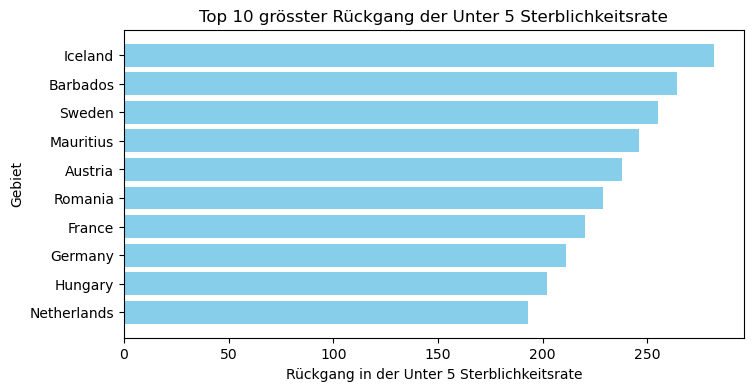

In [720]:
# Berechne den Unterschied zwischen dem ersten und letzten Jahr je Gebiet
df_diff = df.groupby('Gebiet').agg(
    Startjahr=('Jahr', 'min'),
    Endjahr=('Jahr', 'max'),
    Startwert=('Unter 5 Sterblichkeitsrate', lambda x: x.iloc[0]),
    Endwert=('Unter 5 Sterblichkeitsrate', lambda x: x.iloc[-1])
)

# Rückgang berechnen (Startwert - Endwert)
df_diff['Rueckgang'] = df_diff['Startwert'] - df_diff['Endwert']

# Sortieren nach Rückgang und die Top 10 länder auswählen
df_diff_sorted = df_diff.sort_values(by='Rueckgang', ascending=False).head(10)

# Visualisierung der grössten Rückgänge (Top 10)
plt.figure(figsize=(8, 4))
plt.barh(df_diff_sorted.index, df_diff_sorted['Rueckgang'], color='skyblue')
plt.xlabel('Rückgang in der Unter 5 Sterblichkeitsrate')
plt.ylabel('Gebiet')
plt.title('Top 10 grösster Rückgang der Unter 5 Sterblichkeitsrate')
plt.gca().invert_yaxis()  # Um die höchsten Werte oben anzuzeigen
plt.show()

In [721]:
# Berechne den Unterschied zwischen dem ersten und letzten Jahr je Gebiet
df_diff = df.groupby('Gebiet').agg(
    Startjahr=('Jahr', 'min'),
    Endjahr=('Jahr', 'max'),
    Startwert=('Unter 5 Sterblichkeitsrate', lambda x: x.iloc[0]),
    Endwert=('Unter 5 Sterblichkeitsrate', lambda x: x.iloc[-1])
)

# Rückgang berechnen (Startwert - Endwert)
df_diff['Rueckgang'] = df_diff['Startwert'] - df_diff['Endwert']

# Sortieren nach Rückgang
df_diff_sorted = df_diff.sort_values(by='Rueckgang', ascending=False)

# Regionen mit dem größten und schwächsten Rückgang anzeigen
groesster_rueckgang = df_diff_sorted.head(1)
schwaechster_rueckgang = df_diff_sorted.tail(1)

print("Region mit dem grössten Rückgang:")
print(groesster_rueckgang)

print("\nRegion mit dem schwächsten Rückgang:")
print(schwaechster_rueckgang)

Region mit dem grössten Rückgang:
         Startjahr  Endjahr  Startwert  Endwert  Rueckgang
Gebiet                                                    
Iceland       1750     2020        300       18        282

Region mit dem schwächsten Rückgang:
             Startjahr  Endjahr  Startwert  Endwert  Rueckgang
Gebiet                                                        
Netherlands       1750     2020        200        7        193


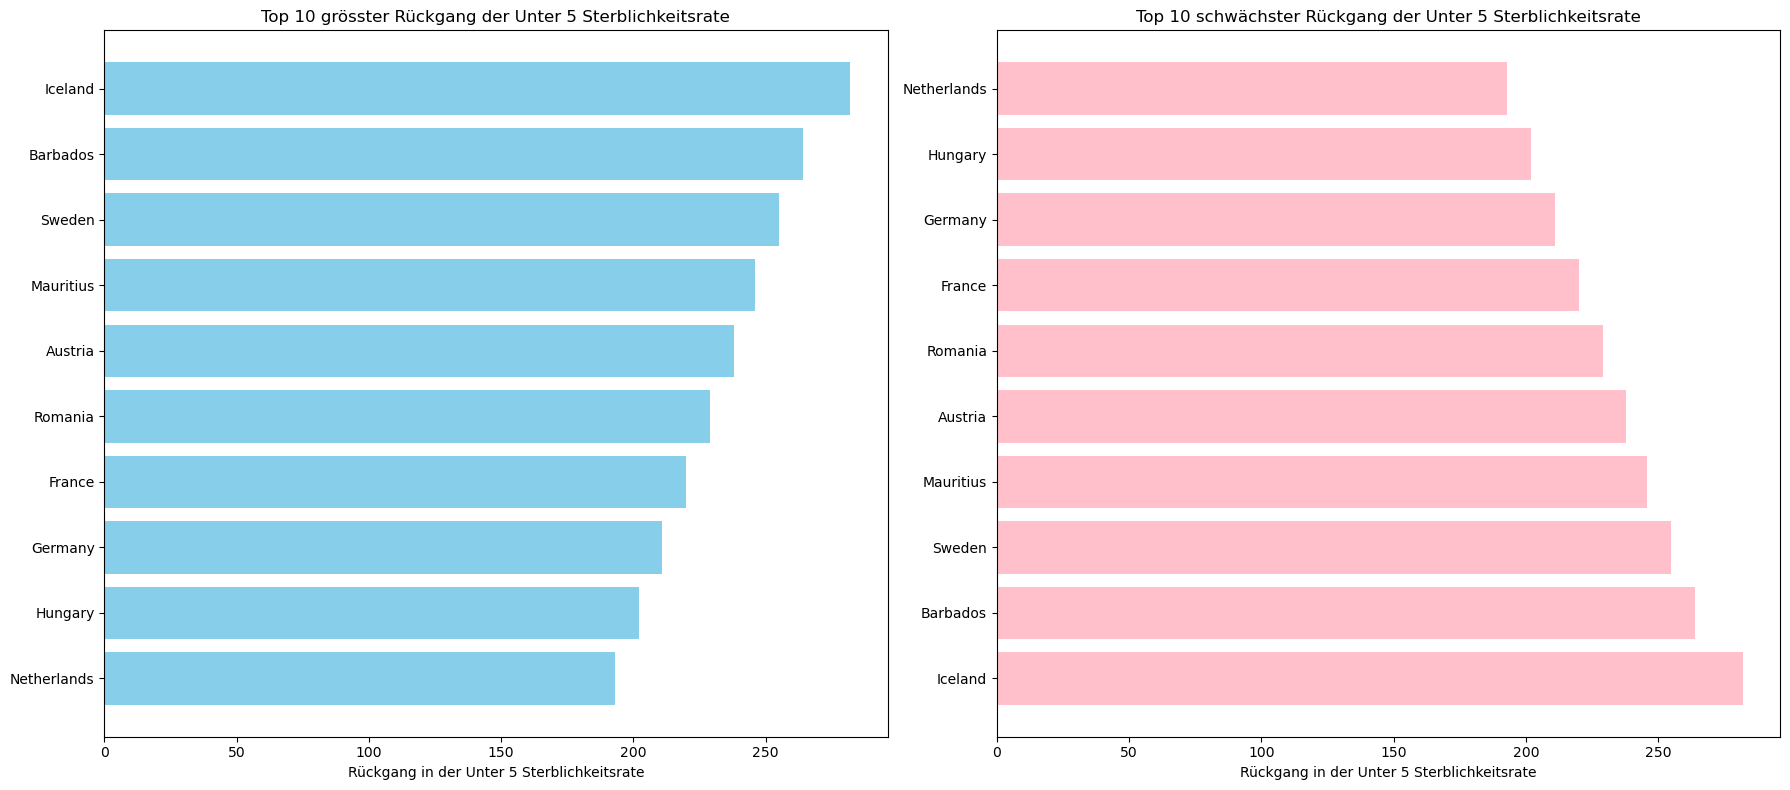

In [722]:

# Berechne den Unterschied zwischen dem ersten und letzten Jahr je Entity
df_diff = df.groupby('Gebiet').agg(
    Startjahr=('Jahr', 'min'),
    Endjahr=('Jahr', 'max'),
    Startwert=('Unter 5 Sterblichkeitsrate', lambda x: x.iloc[0]),
    Endwert=('Unter 5 Sterblichkeitsrate', lambda x: x.iloc[-1])
)

# Rückgang berechnen (Startwert - Endwert)
df_diff['Rueckgang'] = df_diff['Startwert'] - df_diff['Endwert']

# Sortieren nach Rückgang und die Top 10 und schwächsten 10 auswählen
top_10 = df_diff.sort_values(by='Rueckgang', ascending=False).head(10)
schwaechste_10 = df_diff.sort_values(by='Rueckgang', ascending=True).head(10)

# Visualisierung der Top 10 und schwächsten 10 Rückgänge
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Top 10 Rückgänge
ax[0].barh(top_10.index, top_10['Rueckgang'], color='skyblue')
ax[0].set_title('Top 10 grösster Rückgang der Unter 5 Sterblichkeitsrate')
ax[0].set_xlabel('Rückgang in der Unter 5 Sterblichkeitsrate')
ax[0].invert_yaxis()

# Schwächste 10 Rückgänge
ax[1].barh(schwaechste_10.index, schwaechste_10['Rueckgang'], color='pink')
ax[1].set_title('Top 10 schwächster Rückgang der Unter 5 Sterblichkeitsrate')
ax[1].set_xlabel('Rückgang in der Unter 5 Sterblichkeitsrate')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()

### 10. Wie unterscheiden sich die Kindersterblichkeitsraten zwischen einkommensstarken und einkommensschwachen Ländern?

In [723]:
import pandas as pd
from matplotlib import pyplot as plt

In [724]:
# loading the data
df = pd.read_csv('child-deaths-igme-data.csv', skiprows=1,
                 names=['Gebiet','Code','Jahr','Anzahl der Todesfälle bei Kindern unter fünf Jahren']) 
df.head()

,Gebiet,Code,Jahr,Anzahl der Todesfälle bei Kindern unter fünf Jahren
0,Afghanistan,AFG,1968,154615
1,Afghanistan,AFG,1969,155704
2,Afghanistan,AFG,1970,156757
3,Afghanistan,AFG,1971,157792
4,Afghanistan,AFG,1972,158626


### Analyse Gebiete

In [725]:
print('Anzahl verschiedener Gebiete: ', len(df['Gebiet'].unique()))

Anzahl verschiedener Gebiete:  210


In [726]:
# Daten filtern: Sierra Leone und Jahr 2015
filtered_data = df[(df['Gebiet'] == 'Sierra Leone') & (df['Jahr'] == 2015)]

# Anzahl der Todesfälle abrufen
if not filtered_data.empty:
    deaths = filtered_data['Anzahl der Todesfälle bei Kindern unter fünf Jahren'].values[0]
    print(f"Im Jahr 2015 starben in Sierra Leone {deaths} Kinder unter fünf Jahren.")

Im Jahr 2015 starben in Sierra Leone 35272 Kinder unter fünf Jahren.


C:\Users\s-ali\AppData\Local\Temp\ipykernel_22020\1666598364.py:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


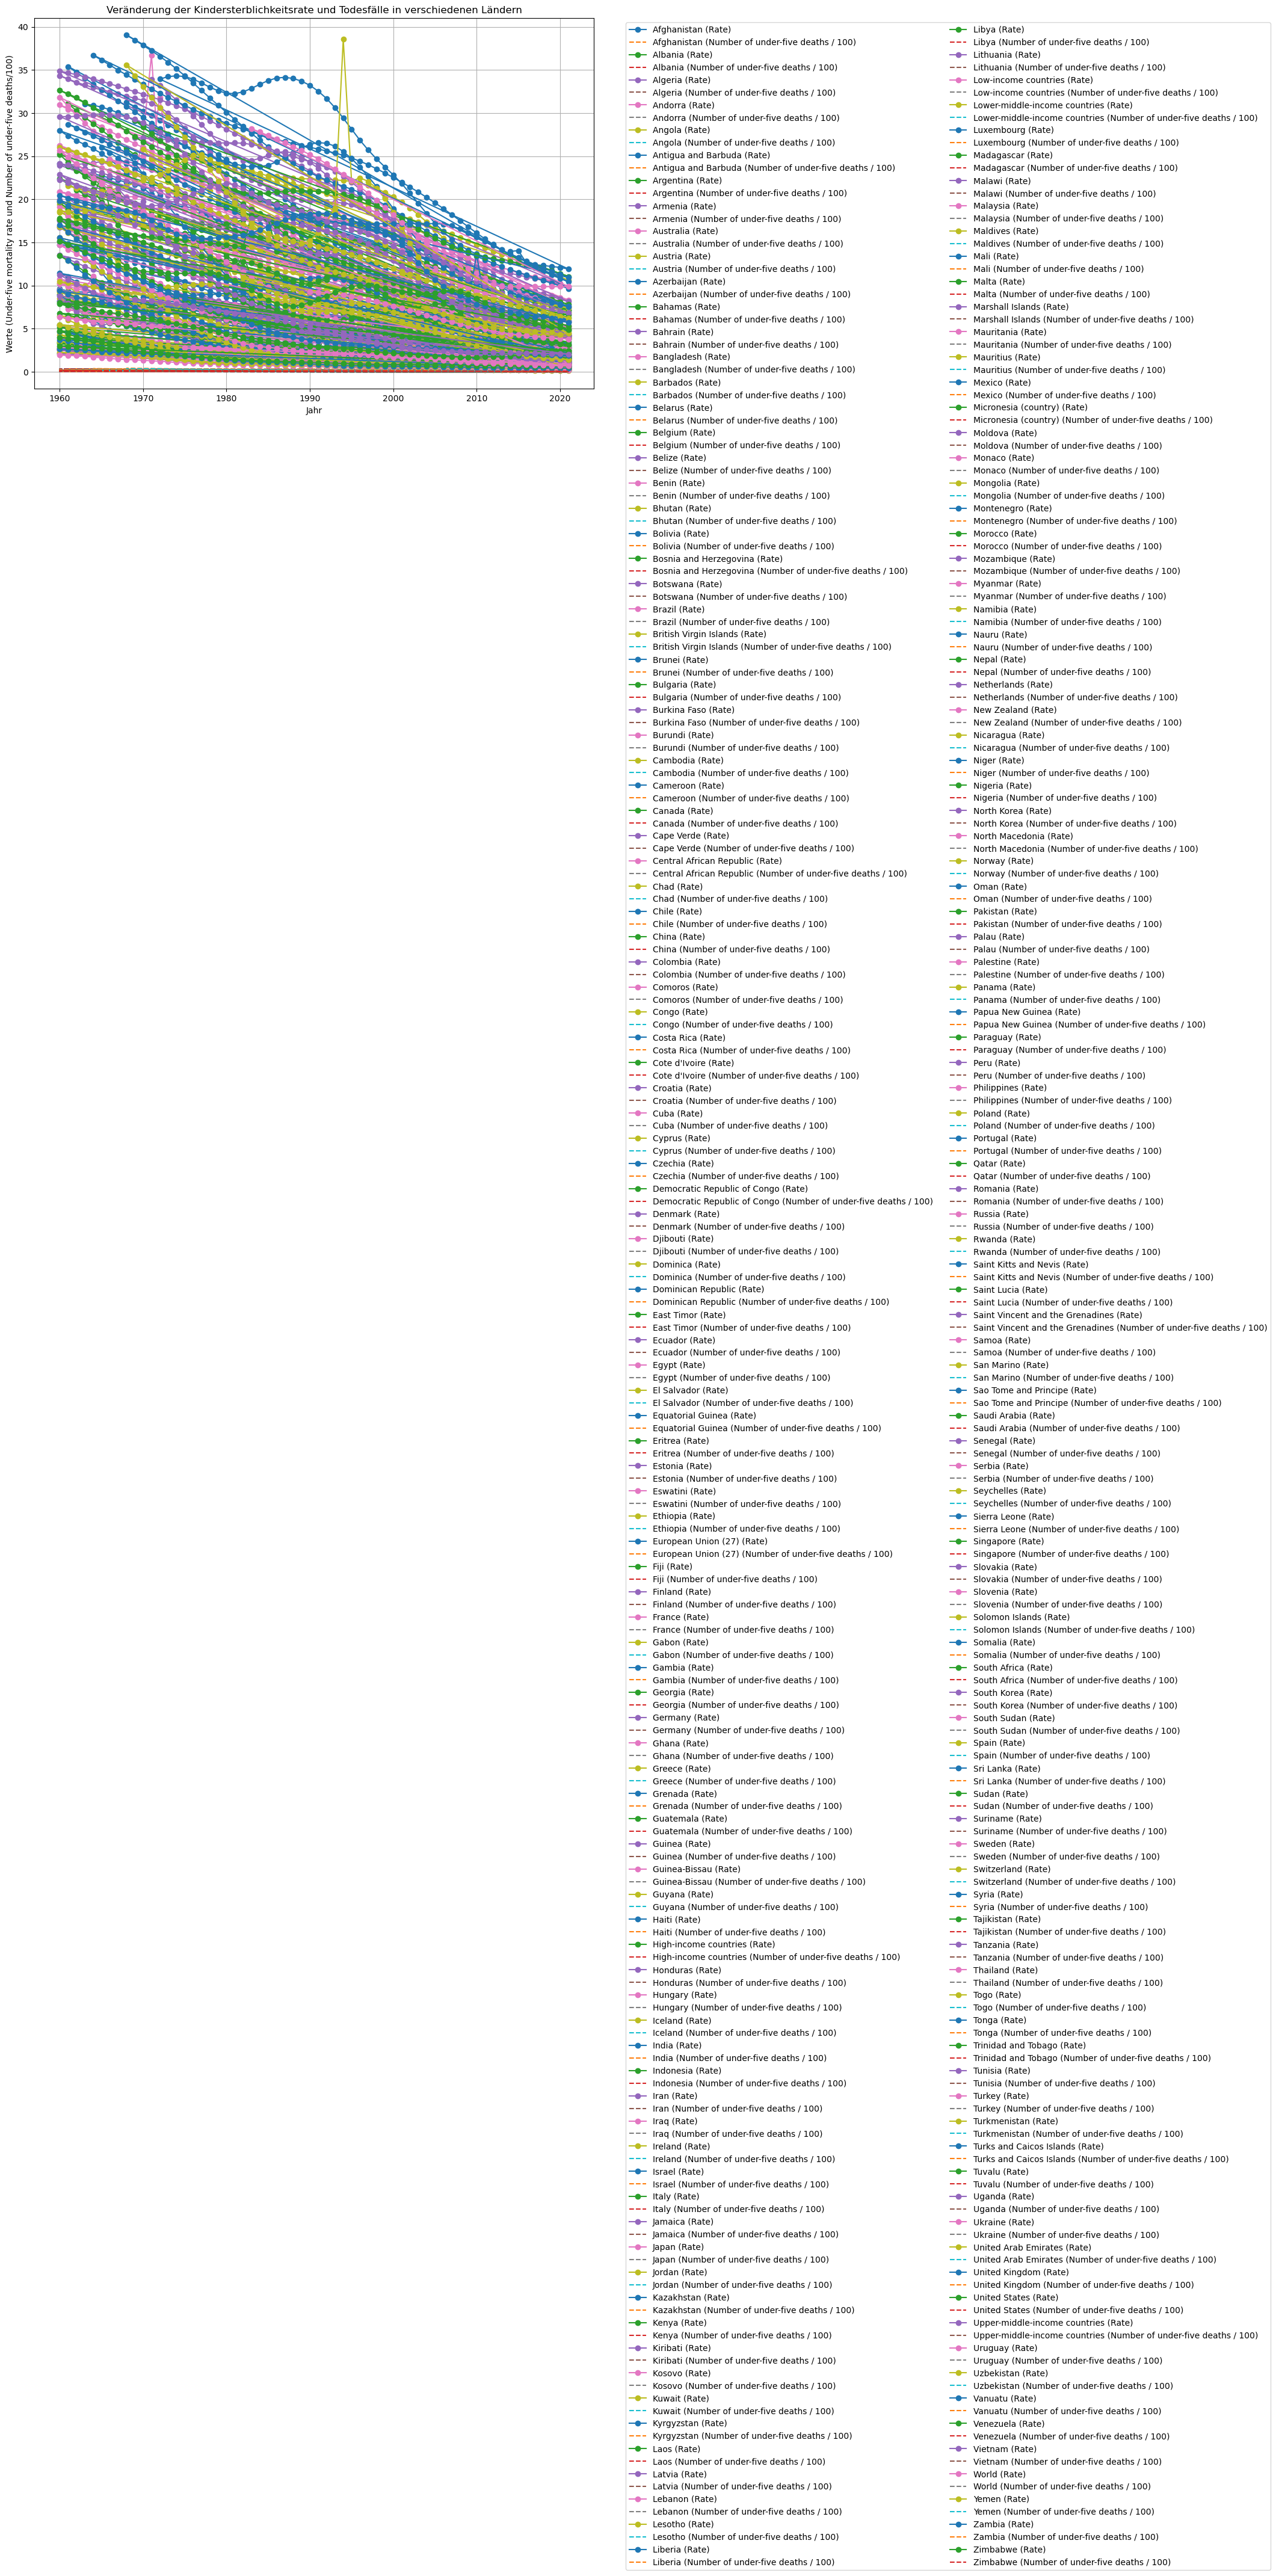

In [727]:
import pandas as pd
import matplotlib.pyplot as plt

# Dateien laden
rate_data = pd.read_csv('child-mortality.csv')  # Datei 1: Kindersterblichkeitsrate
death_data = pd.read_csv('child-deaths-igme-data.csv')  # Datei 2: Anzahl der Todesfälle

# Spaltennamen anpassen (falls nötig)
rate_data.rename(columns={'Entity': 'Gebiet', 'Year': 'Jahr'}, inplace=True)
death_data.rename(columns={'Entity': 'Gebiet', 'Year': 'Jahr'}, inplace=True)

# Dateien zusammenführen
merged_data = rate_data.merge(death_data, on=['Gebiet', 'Jahr'], how='inner')

# Liste der Länder
countries = merged_data['Gebiet'].unique()

# Visualisierung: Kindersterblichkeitsrate und Todesfälle im Vergleich
plt.figure(figsize=(12, 8))

for country in countries:
    country_data = merged_data[merged_data['Gebiet'] == country]
    
    # Plot: Kindersterblichkeitsrate
    plt.plot(country_data['Jahr'], country_data['Under-five mortality rate'], marker='o', label=f'{country} (Rate)')
    
    # Plot: Anzahl der Todesfälle (normiert für bessere Visualisierung)
    plt.plot(country_data['Jahr'], country_data['Under-five mortality rate'] / 100, 
             linestyle='--', label=f'{country} (Number of under-five deaths / 100)')

plt.title('Veränderung der Kindersterblichkeitsrate und Todesfälle in verschiedenen Ländern')
plt.xlabel('Jahr')
plt.ylabel('Werte (Under-five mortality rate und Number of under-five deaths/100)')
plt.legend(ncol=2, bbox_to_anchor=(1.05, 1), loc='upper left')  # Korrektur: 'upper left'
plt.grid(True)
plt.tight_layout()
plt.show()


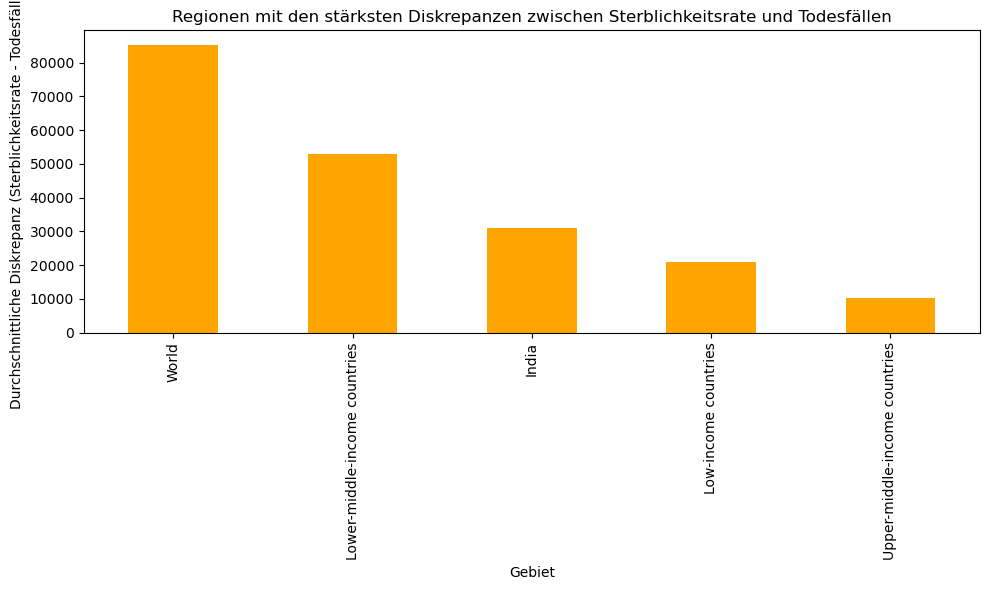

Regionen mit den stärksten Diskrepanzen:
Gebiet
World                            85312.728368
Lower-middle-income countries    52945.527254
India                            31108.414890
Low-income countries             21009.865813
Upper-middle-income countries    10220.587129
Name: Diskrepanz, dtype: float64


In [728]:
import pandas as pd
import matplotlib.pyplot as plt

# Dateien laden
rate_data = pd.read_csv('child-mortality.csv')  # Datei 1: Kindersterblichkeitsrate
death_data = pd.read_csv('child-deaths-igme-data.csv')  # Datei 2: Anzahl der Todesfälle

# Spaltennamen anpassen (falls nötig)
rate_data.rename(columns={'Entity': 'Gebiet', 'Year': 'Jahr', 'Under-five mortality rate': 'Sterblichkeitsrate'}, inplace=True)
death_data.rename(columns={'Entity': 'Gebiet', 'Year': 'Jahr', 'Number of under-five deaths': 'Todesfälle'}, inplace=True)

# Dateien zusammenführen
merged_data = rate_data.merge(death_data, on=['Gebiet', 'Jahr'], how='inner')

# Diskrepanz berechnen: Normierte Differenz zwischen Sterblichkeitsrate und Todesfällen
merged_data['Diskrepanz'] = abs(merged_data['Sterblichkeitsrate'] - (merged_data['Todesfälle'] / 100))

# Durchschnittliche Diskrepanz pro Gebiet berechnen
avg_discrepancy = merged_data.groupby('Gebiet')['Diskrepanz'].mean()

# Regionen mit den stärksten Diskrepanzen (Top 5)
top_discrepancies = avg_discrepancy.sort_values(ascending=False).head(5)

# Visualisierung der stärksten Diskrepanzen
plt.figure(figsize=(10, 6))
top_discrepancies.plot(kind='bar', color='orange')
plt.title('Regionen mit den stärksten Diskrepanzen zwischen Sterblichkeitsrate und Todesfällen')
plt.ylabel('Durchschnittliche Diskrepanz (Sterblichkeitsrate - Todesfälle/100)')
plt.xlabel('Gebiet')
plt.tight_layout()
plt.show()

# Ergebnisse anzeigen
print("Regionen mit den stärksten Diskrepanzen:")
print(top_discrepancies)


In [729]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('child-mortality-by-income-level-of-country.csv')


print(data.columns)


Index(['Entity', 'Code', 'Year',
       'Observation value - Indicator: Under-five mortality rate - Sex: Total - Wealth quintile: Total - Unit of measure: Deaths per 100 live births'],
      dtype='object')


In [730]:
# loading the data
df = pd.read_csv('child-mortality-by-income-level-of-country.csv', skiprows=1,
                 names=['Gebiet','Code','Jahr','Sterblichkeitsrate']) 
df.head()

,Gebiet,Code,Jahr,Sterblichkeitsrate
0,Afghanistan,AFG,1957,37.245758
1,Afghanistan,AFG,1958,36.626625
2,Afghanistan,AFG,1959,36.043480
3,Afghanistan,AFG,1960,35.459850
4,Afghanistan,AFG,1961,34.894880


C:\Users\s-ali\AppData\Local\Temp\ipykernel_22020\2925925978.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Einkommensgruppe'] = filtered_data['Gebiet'].apply(


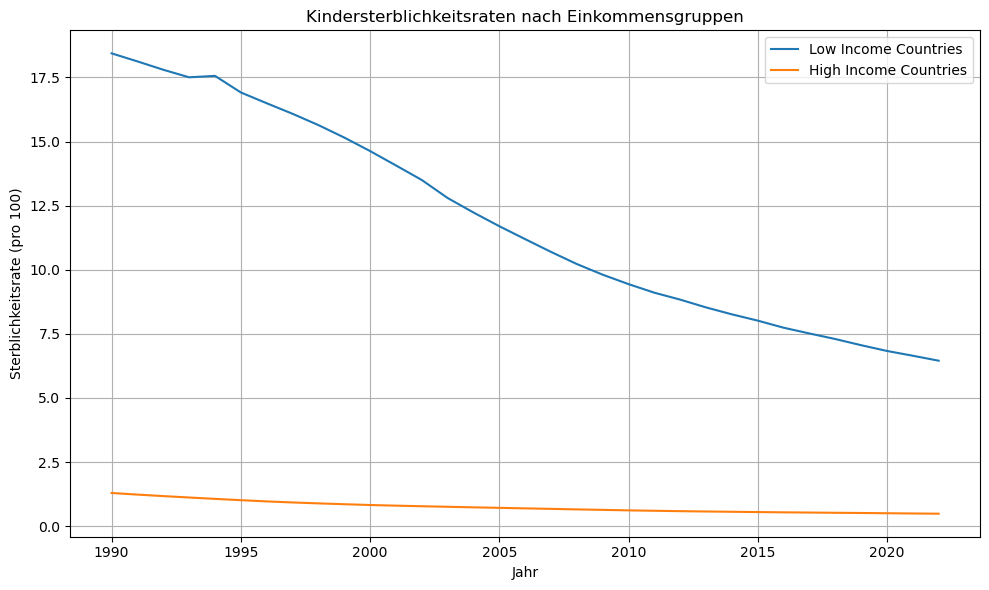

In [731]:
import pandas as pd
import matplotlib.pyplot as plt

# Datei laden
data = pd.read_csv('child-mortality-by-income-level-of-country.csv')  # Ersetze durch deinen tatsächlichen Dateinamen

# Spaltennamen anpassen (korrektes Dictionary verwenden)
data.rename(columns={
    'Entity': 'Gebiet',
    'Year': 'Jahr',
    'Observation value - Indicator: Under-five mortality rate - Sex: Total - Wealth quintile: Total - Unit of measure: Deaths per 100 live births': 'Sterblichkeitsrate'
}, inplace=True)

# Daten filtern: nur Low-income und High-income countries
filtered_data = data[data['Gebiet'].str.contains('income countries')]

# Einkommensniveau zuordnen
filtered_data['Einkommensgruppe'] = filtered_data['Gebiet'].apply(
    lambda x: 'Low Income' if 'Low-income' in x else 'High Income' if 'High-income' in x else 'Other'
)

# Visualisierung: Kindersterblichkeitsraten nach Einkommensgruppen
plt.figure(figsize=(10, 6))

for group in ['Low Income', 'High Income']:
    group_data = filtered_data[filtered_data['Einkommensgruppe'] == group]
    plt.plot(group_data['Jahr'], group_data['Sterblichkeitsrate'], label=f'{group} Countries')

# Diagrammtitel und Beschriftungen
plt.title('Kindersterblichkeitsraten nach Einkommensgruppen')
plt.xlabel('Jahr')
plt.ylabel('Sterblichkeitsrate (pro 100)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Diagramm anzeigen
plt.show()
